In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

593

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | birnin kebbi
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | kropotkin
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | saint-augustin
Processing Record 12 of Set 1 | saravan
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | shimoda
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 22 of Set 1 | 

Processing Record 41 of Set 4 | ust-kulom
Processing Record 42 of Set 4 | esperance
Processing Record 43 of Set 4 | yerbogachen
Processing Record 44 of Set 4 | huron
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | deputatskiy
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | neiafu
Processing Record 50 of Set 4 | santa rosa
Processing Record 1 of Set 5 | borba
Processing Record 2 of Set 5 | sitka
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | letlhakane
Processing Record 5 of Set 5 | sayyan
Processing Record 6 of Set 5 | wala
Processing Record 7 of Set 5 | sarangani
Processing Record 8 of Set 5 | champerico
Processing Record 9 of Set 5 | nsanje
Processing Record 10 of Set 5 | lai
Processing Record 11 of Set 5 | taburao
City not found. Skipping...
Processing Record 12 of Set 5 | half moon bay
Processing Record 13 of Set 5 | forestville
Processing Recor

Processing Record 29 of Set 8 | chenghai
Processing Record 30 of Set 8 | faya
Processing Record 31 of Set 8 | pandan
Processing Record 32 of Set 8 | vieques
Processing Record 33 of Set 8 | herzberg
Processing Record 34 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 35 of Set 8 | tongchuan
Processing Record 36 of Set 8 | poum
Processing Record 37 of Set 8 | svetlaya
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | katherine
Processing Record 40 of Set 8 | kalabo
Processing Record 41 of Set 8 | villa guerrero
Processing Record 42 of Set 8 | ust-tsilma
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | shubarshi
Processing Record 46 of Set 8 | moree
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | rio rancho
Processing Record 49 of Set 8 | grenaa
Processing Record 50 of Set 8 | banda aceh
Processing Record 1 of Set 9 | zeerust
Processing Record 2 of Set 9 |

Processing Record 15 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 16 of Set 12 | oranjemund
Processing Record 17 of Set 12 | tagusao
Processing Record 18 of Set 12 | sovetskiy
Processing Record 19 of Set 12 | ngunguru
Processing Record 20 of Set 12 | vung tau
Processing Record 21 of Set 12 | waterboro
Processing Record 22 of Set 12 | asau
Processing Record 23 of Set 12 | ullapool
Processing Record 24 of Set 12 | nangong
Processing Record 25 of Set 12 | ivdel
Processing Record 26 of Set 12 | sri aman
Processing Record 27 of Set 12 | mentok
City not found. Skipping...
Processing Record 28 of Set 12 | port-gentil
Processing Record 29 of Set 12 | kavieng
Processing Record 30 of Set 12 | keokuk
Processing Record 31 of Set 12 | gorin
Processing Record 32 of Set 12 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 33 of Set 12 | lucapa
Processing Record 34 of Set 12 | khorinsk
Processing Record 35 of Set 12 | sao jose da coroa grande
Processing 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2022-07-22 19:29:13,73.5069,80.5464,53.02,72,100,12.84
1,Qaqortoq,GL,2022-07-22 19:29:13,60.7167,-46.0333,51.30,72,26,4.34
2,Bethel,US,2022-07-22 19:29:14,41.3712,-73.4140,95.04,38,0,10.36
3,Vaini,TO,2022-07-22 19:28:08,-21.2000,-175.2000,71.76,94,20,6.91
4,Khatanga,RU,2022-07-22 19:29:15,71.9667,102.5000,44.29,88,100,14.23
5,Birnin Kebbi,NG,2022-07-22 19:29:15,12.4539,4.1975,86.83,54,100,5.77
6,Punta Arenas,CL,2022-07-22 19:27:00,-53.1500,-70.9167,41.02,70,0,19.57
7,Saint George,US,2022-07-22 19:29:16,37.1041,-113.5841,109.80,13,0,8.05
8,Kropotkin,RU,2022-07-22 19:29:17,45.4375,40.5756,64.51,80,9,13.18
9,Yellowknife,CA,2022-07-22 19:27:51,62.4560,-114.3525,68.52,49,40,9.22


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658519073.551309

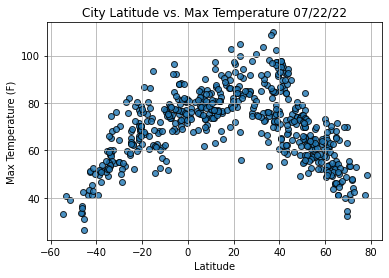

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

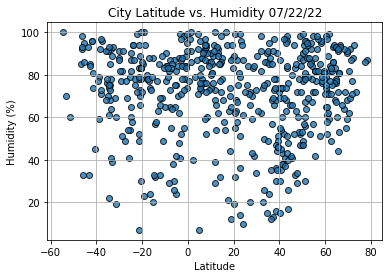

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


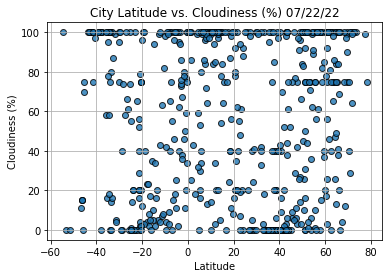

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


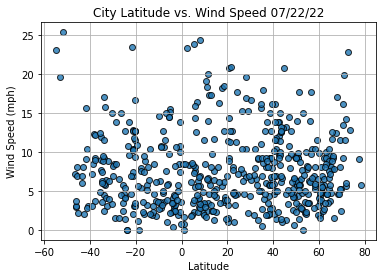

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

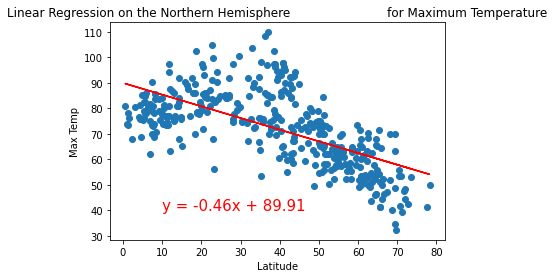

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

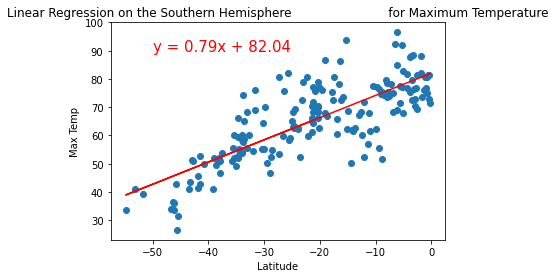

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

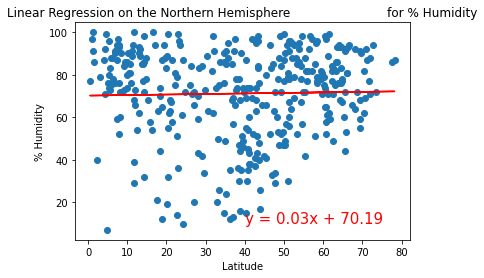

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

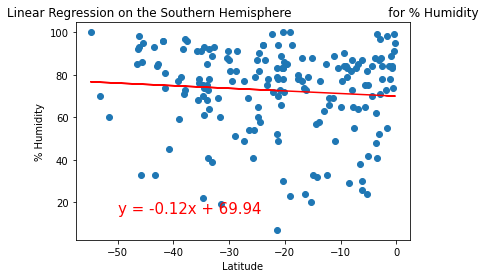

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

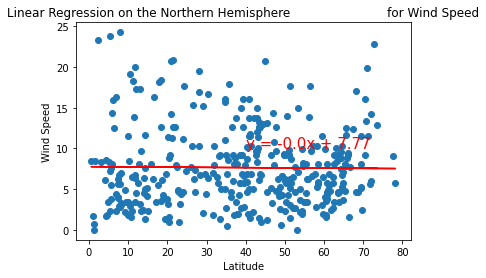

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

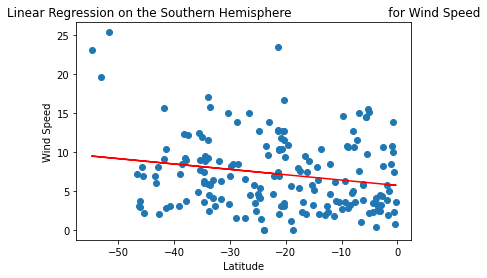

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

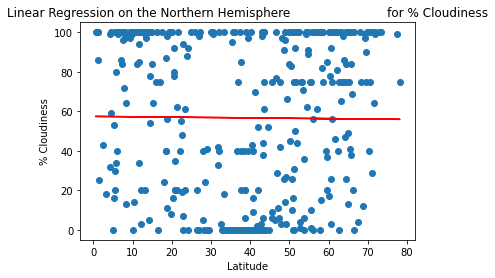

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

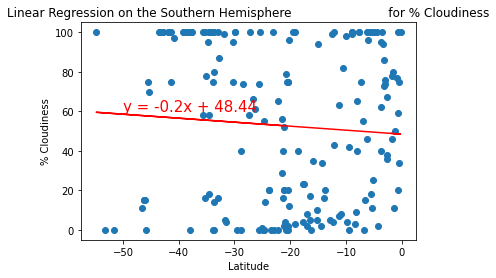

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

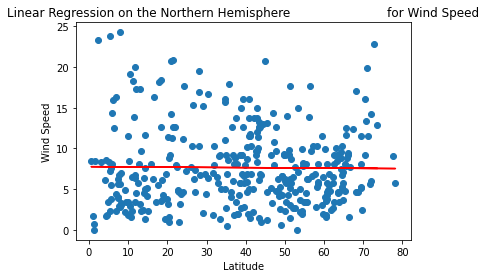

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

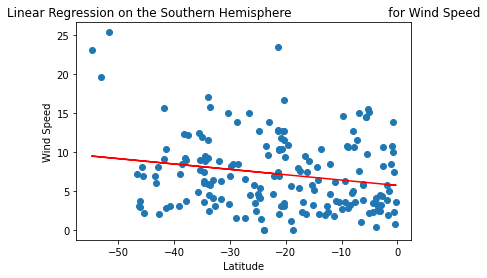

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))